In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_diabetes

In [5]:
data = load_diabetes()

In [8]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [10]:
X = data.data
y = data.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 45)

In [13]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

print("THe r2_score of the lr model is: ",r2_score(y_test, y_pred))
print("THe RMSE of the lr model is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

THe r2_score of the lr model is:  0.5188113124539249
THe RMSE of the lr model is:  48.72713760953253


# Same work but with ridge regressor

In [36]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001) # This is the value of lambda

In [37]:
R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [38]:
y_pred = R.predict(X_test)

In [39]:
print("THe r2_score of the lr model is: ",r2_score(y_test, y_pred))
print("THe RMSE of the lr model is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

# You can see the accuracey is exactly same but if you change the valuse of alpha the accuracy will upgrade

THe r2_score of the lr model is:  0.518973263588495
THe RMSE of the lr model is:  48.718937001819555


In [72]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.1) # This is the value of lambda

In [73]:
R.fit(X_train, y_train)

Ridge(alpha=0.1)

In [74]:
y_pred = R.predict(X_test)

In [75]:
print("THe r2_score of the lr model is: ",r2_score(y_test, y_pred))
print("THe RMSE of the lr model is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

THe r2_score of the lr model is:  0.5208421054129915
THe RMSE of the lr model is:  48.62420568515607


#  PLotting the difference between 3 alpha values with generated dataset on a degree 16 Polynomial regression
Basically difference between underfit overfit and a balanced line

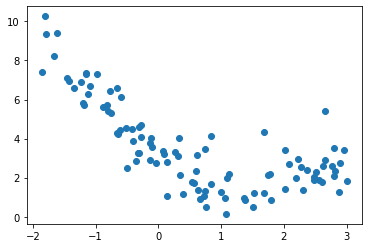

In [78]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

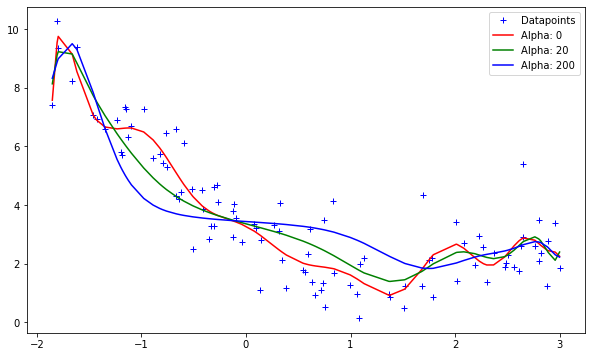

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

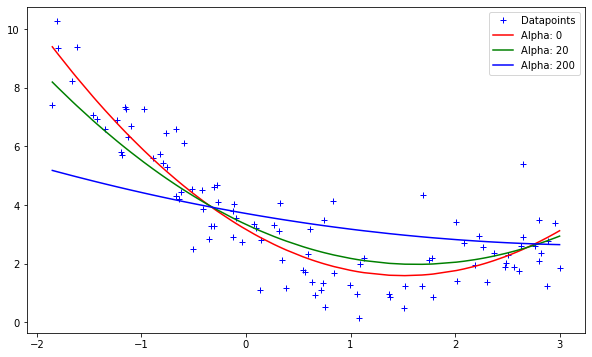

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=2)), # with degree 2
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

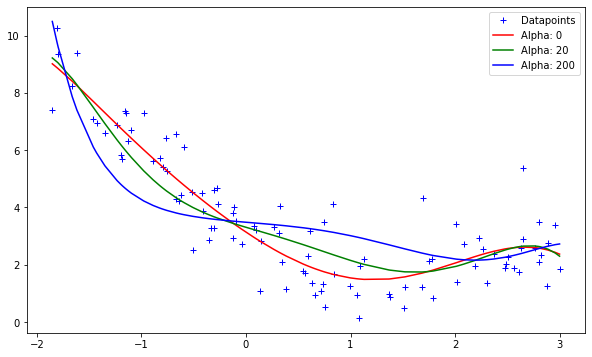

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=7)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

## See how the red line is overfitting and the blue line is underfitting in different polynomial degrees

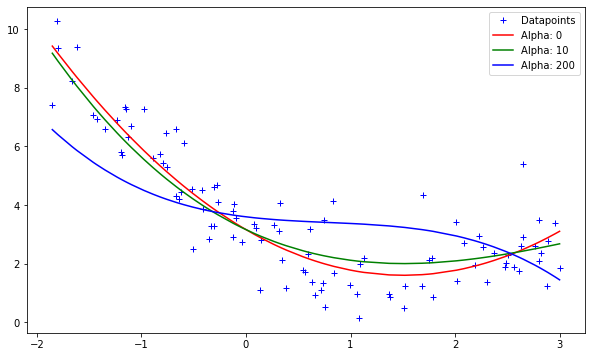

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=3)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 10, 200]
cs = ['r', 'g', 'b']
ss
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()